# Импорт

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
from PIL import Image
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

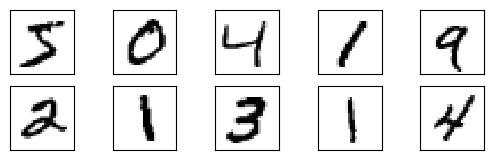

In [3]:
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary, interpolation='nearest')

# Нормализация

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [6]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Модель

In [7]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


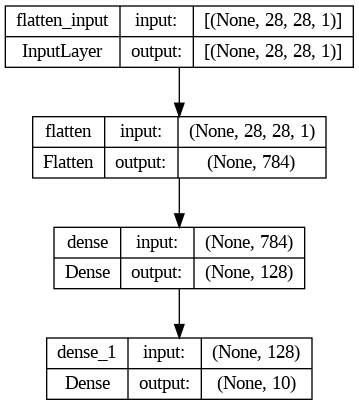

In [9]:
plot_model(model, to_file='model.png', show_shapes=True)

# Компиляция

In [10]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Обучение

In [11]:
history = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2842 - accuracy: 0.9184 - val_loss: 0.1559 - val_accuracy: 0.9560
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1264 - accuracy: 0.9629 - val_loss: 0.1191 - val_accuracy: 0.9655
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0872 - accuracy: 0.9740 - val_loss: 0.1029 - val_accuracy: 0.9690
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0648 - accuracy: 0.9803 - val_loss: 0.0942 - val_accuracy: 0.9722
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0507 - accuracy: 0.9847 - val_loss: 0.0915 - val_accuracy: 0.9722


# Визуализация процесса обучения

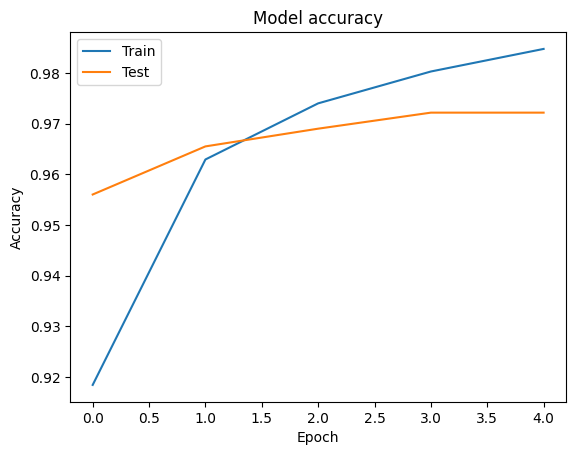

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

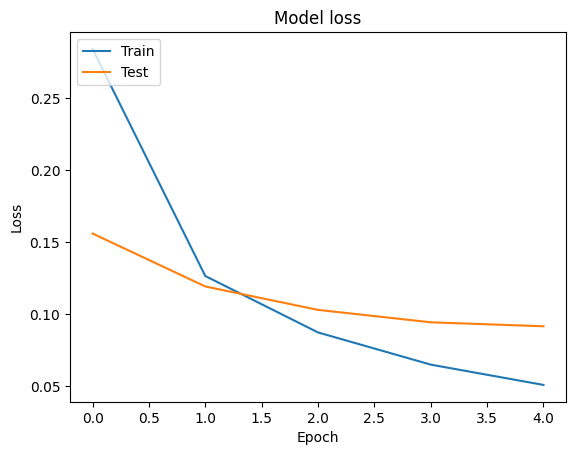

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# MNIST-проверка

In [14]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9751


[0.08246113359928131, 0.9750999808311462]

# Проверка собственных цифр

In [15]:
my_y_test = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
my_y_test_cat = keras.utils.to_categorical(my_y_test, 10)

In [16]:
image_matrices = []
image_paths = [
    '/content/drive/MyDrive/data/digits/0.png',
    '/content/drive/MyDrive/data/digits/1.png',
    '/content/drive/MyDrive/data/digits/2.png',
    '/content/drive/MyDrive/data/digits/3.png',
    '/content/drive/MyDrive/data/digits/4.png',
    '/content/drive/MyDrive/data/digits/5.png',
    '/content/drive/MyDrive/data/digits/6.png',
    '/content/drive/MyDrive/data/digits/7.png',
    '/content/drive/MyDrive/data/digits/8.png',
    '/content/drive/MyDrive/data/digits/9.png',
]

for path in image_paths:
    img = Image.open(path)
    img_gray = img.convert('L')
    img_array = np.array(img_gray)
    image_matrices.append(img_array)

my_X_test = np.array(image_matrices)
my_X_test = my_X_test / 255

In [17]:
model.evaluate(my_X_test, my_y_test_cat)

1/1 [==============================] - 0s 36ms/step - loss: 3.2900 - accuracy: 0.5000


[3.289959669113159, 0.5]